In [ ]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.dates as mdates  # Ensure this line is included

Cleaned Dataset:

In [ ]:
# Read the data from the CSV file into a pandas DataFrame
Data = pd.read_csv("final_table.csv")
Data.head(5)

,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
0,170626010790603094,2017-06-26,1079,1129468649,20863017,6.99,1,0.0,YVES FALAFEL BALLS,Deli,Gourmet Foods,Gourmet Foods,Meat Alternatives,YVES,1.0,G,240.0
1,170626010790603067,2017-06-26,1079,1048060135,20425475,12.09,1,0.0,ACSE LEMON AND LIME JUICER,Home,Kitchen Prep,Kitchen Gadgets,Baking & Cooking,ACSE,1.0,EA,1.0
2,170626010790603073,2017-06-26,1079,1018749739,20842545,4.49,1,0.0,FROSTED FLAKES CEREAL,Grocery,Breakfast,Cereal Rte,Adult,KLGS,1.0,G,425.0
3,170626010790603073,2017-06-26,1079,1018749739,20293336007,1.94,1,0.0,GM NANTUCKET MED ROAST KCUP,Grocery,Hot Beverages & Accessories,Coffee,Single Cup,KRIG,1.0,EA,12.0
4,170626010790603050,2017-06-26,1079,1092380896,20664782003,5.99,1,0.0,PERRIER SLIM CANS LIME,Grocery,Cold Beverages,Water,Carbonated Flavor,PERI,10.0,ML,250.0


In [ ]:
Data.head(100)

,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
0,170626010790603094,2017-06-26,1079,1129468649,20863017,6.99,1,0.0,YVES FALAFEL BALLS,Deli,Gourmet Foods,Gourmet Foods,Meat Alternatives,YVES,1.0,G,240.0
1,170626010790603067,2017-06-26,1079,1048060135,20425475,12.09,1,0.0,ACSE LEMON AND LIME JUICER,Home,Kitchen Prep,Kitchen Gadgets,Baking & Cooking,ACSE,1.0,EA,1.0
2,170626010790603073,2017-06-26,1079,1018749739,20842545,4.49,1,0.0,FROSTED FLAKES CEREAL,Grocery,Breakfast,Cereal Rte,Adult,KLGS,1.0,G,425.0
3,170626010790603073,2017-06-26,1079,1018749739,20293336007,1.94,1,0.0,GM NANTUCKET MED ROAST KCUP,Grocery,Hot Beverages & Accessories,Coffee,Single Cup,KRIG,1.0,EA,12.0
4,170626010790603050,2017-06-26,1079,1092380896,20664782003,5.99,1,0.0,PERRIER SLIM CANS LIME,Grocery,Cold Beverages,Water,Carbonated Flavor,PERI,10.0,ML,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,170624010110202492,2017-06-24,1011,1135041009,20996254,0.00,0,0.0,RAWL MINI SPORTS BALLS,Entertainment,Sports,Sporting Goods,Balls,UNGM,1.0,EA,1.0
96,170624010320208490,2017-06-24,1032,1013174778,20314862002,0.00,0,0.0,DAN D PAK CASHEWS SALTED,Grocery,Snacks,Nuts/Seeds/Meat Snac,Cashews,DAND,1.0,G,908.0
97,170624010640202533,2017-06-24,1064,1055061934,21033746,0.00,0,0.0,ACSE PREMIUM BQT B,Floral,Floral,Cut Flowers,Stems & Bunches,ACSE,1.0,EA,1.0
98,170624010220304237,2017-06-24,1022,1014171557,20121169,0.00,0,0.0,CL LEAF SALMON SOCKEYE LS,Grocery,Canned,Canned Fish/Meat,Canned Salmon,CLVL,1.0,G,213.0


1. Understanding the Basic Structure of the Data

In [ ]:
#Get the data types and number of non-null values.
info = Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45118472 entries, 0 to 45118471
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   trans_id             int64  
 1   trans_dt             object 
 2   store_id             int64  
 3   cust_id              int64  
 4   prod_id              int64  
 5   sales_amt            float64
 6   sales_qty            int64  
 7   sales_wgt            float64
 8   prod_desc            object 
 9   prod_section         object 
 10  prod_category        object 
 11  prod_subcategory     object 
 12  prod_type            object 
 13  prod_mfc_brand_cd    object 
 14  prod_unit_qty_count  float64
 15  prod_count_uom       object 
 16  prod_uom_value       float64
dtypes: float64(4), int64(5), object(8)
memory usage: 5.7+ GB


In [ ]:
#Get a statistical summary of the numerical features.
description = Data.describe()
description

,trans_id,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_unit_qty_count,prod_uom_value
count,4.511847e+07,4.511847e+07,4.511847e+07,4.511847e+07,4.511847e+07,4.511847e+07,4.511847e+07,4.511847e+07,4.511847e+07
mean,1.833146e+17,1.068495e+03,6.150609e+12,7.676709e+09,5.368145e+00,1.257294e+00,1.000575e-01,1.585711e+00,2.175099e+02
std,7.761259e+15,7.263049e+01,1.804147e+13,9.850547e+09,1.722357e+01,1.087323e+00,3.723249e-01,7.654873e+00,2.593836e+02
min,1.706240e+17,1.000000e+03,1.000003e+09,2.000000e+07,-1.837000e+03,-2.890000e+02,-1.430000e+01,1.000000e+00,1.000000e-02
25%,1.803030e+17,1.016000e+03,1.124617e+09,2.055459e+07,2.490000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,1.810140e+17,1.040000e+03,1.129342e+09,2.101176e+07,3.990000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+02
75%,1.906020e+17,1.099000e+03,1.144111e+09,2.016295e+10,5.990000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.750000e+02
max,2.001310e+17,5.264000e+03,6.000314e+13,2.124746e+10,3.814250e+04,1.604000e+03,5.333300e+02,7.080000e+02,7.480000e+03


The statistical summary of the dataset showcases over 45 million transactions, with a wide range of sales amounts and quantities, highlighting considerable variability in customer purchases and product sales across the supermarket chain.

In [ ]:
#Checking both number of columns and rows
print(f"Number of rows: {Data.shape[0]}")
print(f"Number of columns: {Data.shape[1]}")

Number of rows: 45118472
Number of columns: 17


In [ ]:
#Find out how many unique values are there.
unique_values = Data.nunique()
unique_values

trans_id               5455900
trans_dt                   928
store_id                    58
cust_id                 404660
prod_id                 103540
sales_amt                27878
sales_qty                  224
sales_wgt                 2181
prod_desc                97997
prod_section                32
prod_category              100
prod_subcategory           411
prod_type                 1918
prod_mfc_brand_cd         4272
prod_unit_qty_count         77
prod_count_uom              12
prod_uom_value            1392
dtype: int64

The dataset contains a rich diversity of data with millions of unique transactions, customers, and products, along with a broad range of sales amounts and quantities, reflecting the extensive operations and varied inventory of the ACSE Supermarket chain.

In [ ]:
#Check for missing data
missing_values = Data.isnull().sum()
missing_values

trans_id                     0
trans_dt                     0
store_id                     0
cust_id                      0
prod_id                      0
sales_amt                    0
sales_qty                    0
sales_wgt                    0
prod_desc                    0
prod_section                 0
prod_category                0
prod_subcategory             0
prod_type              1226068
prod_mfc_brand_cd            0
prod_unit_qty_count          0
prod_count_uom               0
prod_uom_value               0
dtype: int64

The provided data indicates that the dataset is largely complete with the exception of the 'prod_type' column, which contains 122,068 missing values

In [ ]:
# compute 'corr' matrix
corr = Data.corr(numeric_only=True)
# Use the 'style' property to set the table properties and format the numbers
styled_corr = corr.style.background_gradient(cmap='coolwarm') \
                    .format("{:.2f}") \
                    .set_properties(**{'font-size': '9pt', 'font-family': 'Calibri'}) \
                    .set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])\
                    .set_caption("Heatmap of Numeric Columns in Data")
# To display result
styled_corr

,trans_id,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_unit_qty_count,prod_uom_value
trans_id,1.00,0.01,-0.15,-0.01,0.01,-0.00,-0.01,0.00,0.01
store_id,0.01,1.00,-0.01,0.01,-0.00,-0.00,0.00,-0.00,-0.00
cust_id,-0.15,-0.01,1.00,-0.01,0.01,-0.00,-0.00,0.00,-0.00
prod_id,-0.01,0.01,-0.01,1.00,-0.05,-0.02,0.13,-0.01,-0.09
sales_amt,0.01,-0.00,0.01,-0.05,1.00,0.10,0.07,0.00,0.01
sales_qty,-0.00,-0.00,-0.00,-0.02,0.10,1.00,-0.01,-0.00,-0.03
sales_wgt,-0.01,0.00,-0.00,0.13,0.07,-0.01,1.00,-0.02,-0.22
prod_unit_qty_count,0.00,-0.00,0.00,-0.01,0.00,-0.00,-0.02,1.00,-0.01
prod_uom_value,0.01,-0.00,-0.00,-0.09,0.01,-0.03,-0.22,-0.01,1.00


The heatmap of numerical columns in this dataset indicates mostly low correlation values between variables, suggesting that there is no strong linear relationship among these features, which could probably mean a diverse range of factors influence sales amounts and quantities within the ACSE Supermarket's transactions.

In [ ]:
# List all columns
columns_list = Data.columns.tolist()
print("Columns in the DataFrame:")
for column in columns_list:
    print(column)

Columns in the DataFrame:
trans_id
trans_dt
store_id
cust_id
prod_id
sales_amt
sales_qty
sales_wgt
prod_desc
prod_section
prod_category
prod_subcategory
prod_type
prod_mfc_brand_cd
prod_unit_qty_count
prod_count_uom
prod_uom_value


QUESTION 1: How many unique products have been purchased by customers?

In [ ]:
# Create a DataFrame with just the product hierarchy columns
product_hierarchy = Data[['prod_section', 'prod_category', 'prod_subcategory', 'prod_type', 'prod_id']]

# Drop duplicate rows to find unique combinations
unique_products = product_hierarchy.drop_duplicates()

# Count the number of unique products
number_of_unique_products = unique_products.shape[0]

print(f'The number of unique products purchased by customers is: {number_of_unique_products}')

The number of unique products purchased by customers is: 103540


QUESTION 2: Product category distribution. Which category comprises the majority of purchased
products?

In [ ]:
# Calculate the frequency of each category in the purchased products
category_distribution = Data['prod_category'].value_counts()
# Find the category with the maximum frequency
top_category = category_distribution.idxmax()
top_category_count = category_distribution.max()

# Display the category distribution and the top category
print("Product category distribution:\n", category_distribution)

Product category distribution:
 prod_category
Vegetables                5669242
Fruit                     3928211
Snacks                    2370717
Natural Foods             2233586
Household                 1813140
                           ...   
Other                           5
Cosmetic Fragrances             3
Jewelery & Accessories          3
Supplies                        2
Cosmetic Treatments             1
Name: count, Length: 100, dtype: int64


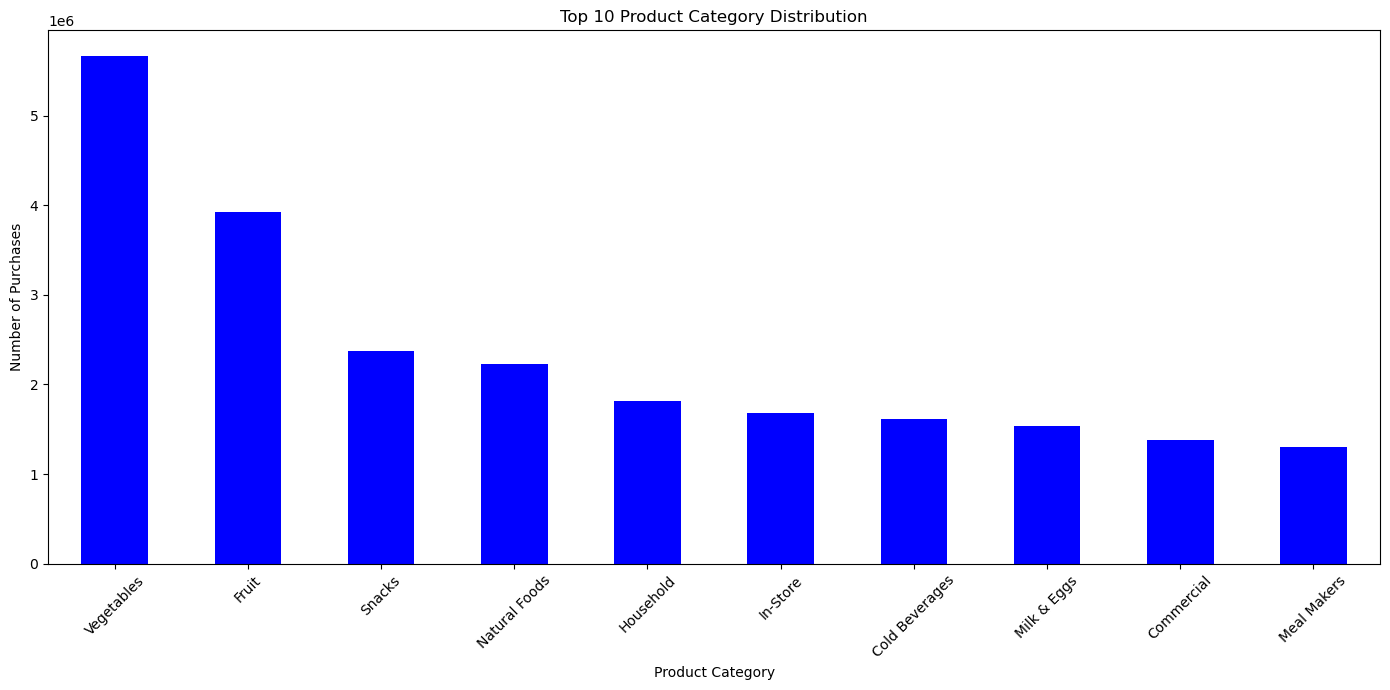

The top category with the majority of purchased products is: 'Vegetables' with 5669242 purchases.


In [ ]:
# Calculate the frequency of each category in the purchased products
category_distribution = Data['prod_category'].value_counts()
# Get the top 10 categories
top_10_categories = category_distribution.head(10)
# Plot the distribution of the top 10 product categories
plt.figure(figsize=(14, 7))
top_10_categories.plot(kind='bar', color='blue')
plt.title('Top 10 Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

# Find the top category from the top 10
top_category = top_10_categories.idxmax()
top_category_count = top_10_categories.max()

# Display the top category information
print(f"The top category with the majority of purchased products is: '{top_category}' with {top_category_count} purchases.")

QUESTION 3: What are the products with the best revenue and transaction volume?

○ Show the product distribution by revenue and transaction volume.

In [ ]:
# Calculate total revenue and transaction volume (sales_qty) for each product
# across all levels of hierarchy: section, category, subcategory, type, product.
product_revenue = Data.groupby([ 'prod_id','prod_section', 'prod_category', 'prod_subcategory', 'prod_type'])['sales_amt'].sum().reset_index(name='total_revenue')
product_volume = Data.groupby([ 'prod_id','prod_section', 'prod_category', 'prod_subcategory', 'prod_type'])['sales_qty'].sum().reset_index(name='transaction_volume')

# Merge the two dataframes to have revenue and volume side by side
product_performance = pd.merge(product_revenue, product_volume, on=['prod_section', 'prod_category', 'prod_subcategory', 'prod_type', 'prod_id'])

# Creating DataFrames from the sample data
top_revenue_products = pd.DataFrame(product_performance.sort_values(by='total_revenue', ascending=False).head(10))
top_volume_products = pd.DataFrame(product_performance.sort_values(by='transaction_volume', ascending=False).head(10))

Top 10 products by revenue:


,prod_id,prod_section,prod_category,prod_subcategory,prod_type,total_revenue,transaction_volume
1218,20027156,Customer Service,Lottery - Electronic,LOTTERY - ELECTRONIC,Electronic,1072253.75,93952
84837,20175355001,Produce,Fruit,Bananas,Yellow,1052886.84,737799
61325,21087193,Meat,Fresh-Poultry,Fresh-Poultry,Breasts,775428.01,68869
92721,20425775001,Produce,Fruit,Grapes,Green Grapes,756235.44,119984
8940,20252014,HMR,HMR,Ready to Eat,Whole Rotisserie Chicken,755620.45,63705
15155,20600985,Deli,Gourmet Foods,Gourmet Foods,Olives,673152.02,93454
23863,20794110,Meat,Fresh Beef,Fresh-Beef,AAA,641822.43,9145
84569,20159199001,Produce,Fruit,Grapes,Red Grapes,640238.30,113183
25710,20821992,Meat,Fresh-Poultry,Fresh-Poultry,Breasts,619704.29,35152
8557,20188873,Dairy,Milk & Eggs,Milk,Core Milk,612231.33,139919


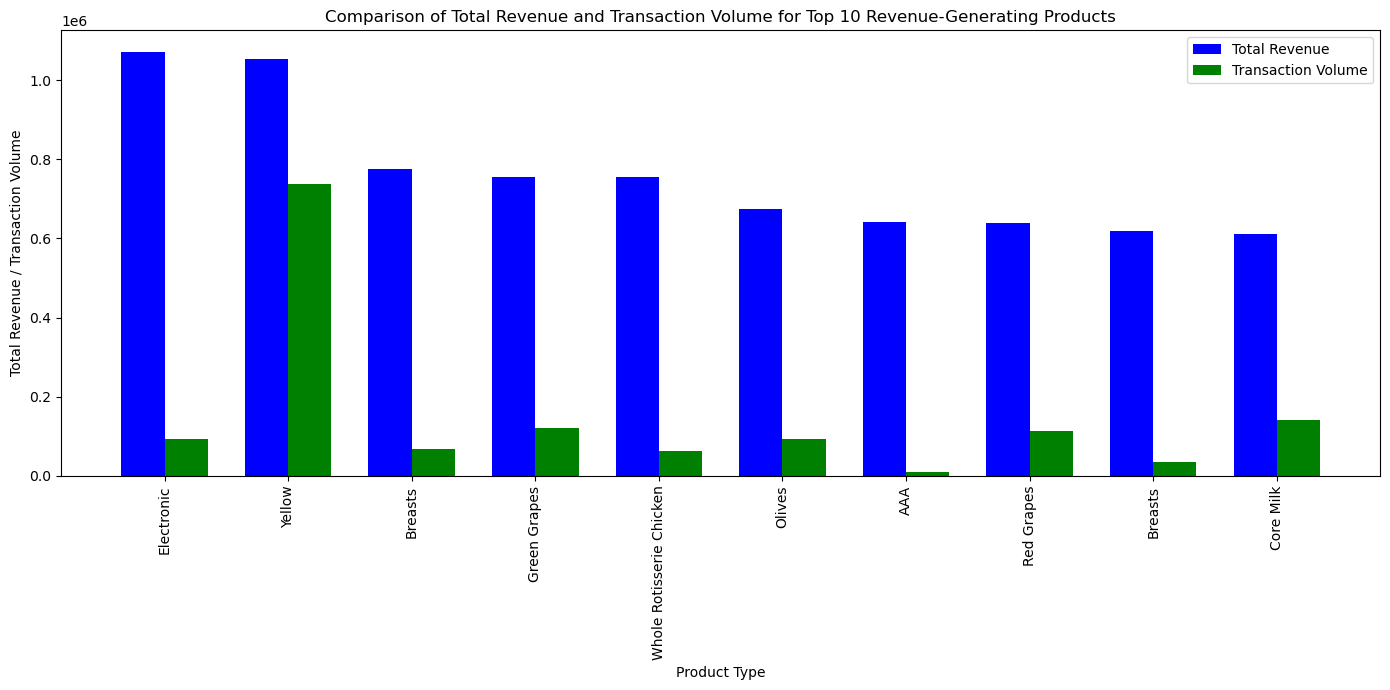

In [ ]:
# Display the data as tables using the DataFrame display
print("Top 10 products by revenue:")
display(top_revenue_products)
#display(top_revenue_products.drop(['transaction_volume'], axis=1))

# Setting up for side-by-side bar plot
bar_width = 0.35
index = np.arange(len(top_revenue_products))

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(index - bar_width/2, top_revenue_products['total_revenue'], bar_width, label='Total Revenue', color='blue')
bars2 = ax.bar(index + bar_width/2, top_revenue_products['transaction_volume'], bar_width, label='Transaction Volume', color='green')

ax.set_xlabel('Product Type')
ax.set_ylabel('Total Revenue / Transaction Volume')
ax.set_title('Comparison of Total Revenue and Transaction Volume for Top 10 Revenue-Generating Products')
ax.set_xticks(index)
ax.set_xticklabels(top_revenue_products['prod_type'])
ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From this visualization, it can be inferred that some products, like electronics and certain produce items, bring in significant revenue despite not being the most frequently sold items. This highlights the impact of high-value items on the company's earnings and the importance of balancing both high-turnover and high-margin products in ACSE's inventory management strategy.


Top 10 products by transaction volume:


,prod_id,prod_section,prod_category,prod_subcategory,prod_type,total_revenue,transaction_volume
8570,20189092,Home,Household,Front End Bags,Front End Bags,165750.63,3309848
84837,20175355001,Produce,Fruit,Bananas,Yellow,1052886.84,737799
101574,21097012001,Produce,Fruit,Tropical,Avocado,579378.83,336738
82645,20028593001,Produce,Fruit,Citrus,Lemons,313774.12,305189
82842,20040489001,Produce,Fruit,Citrus,Limes,193373.91,281332
83242,20070132001,Produce,Vegetables,Field Veg,Seedless,493495.63,260311
3469,20076950,Bakery Instore,In-Store,Rolls-In-Store,Sandwich Rolls,176265.85,245265
97272,20812144001,Dairy,Milk & Eggs,Eggs,Core,498331.47,210452
84346,20145621001,Produce,Vegetables,Cooking Veg,Broccoli,501997.65,176687
84116,20128938001,Produce,Fruit,Berries/Cherries,Raspberries,525740.69,174815


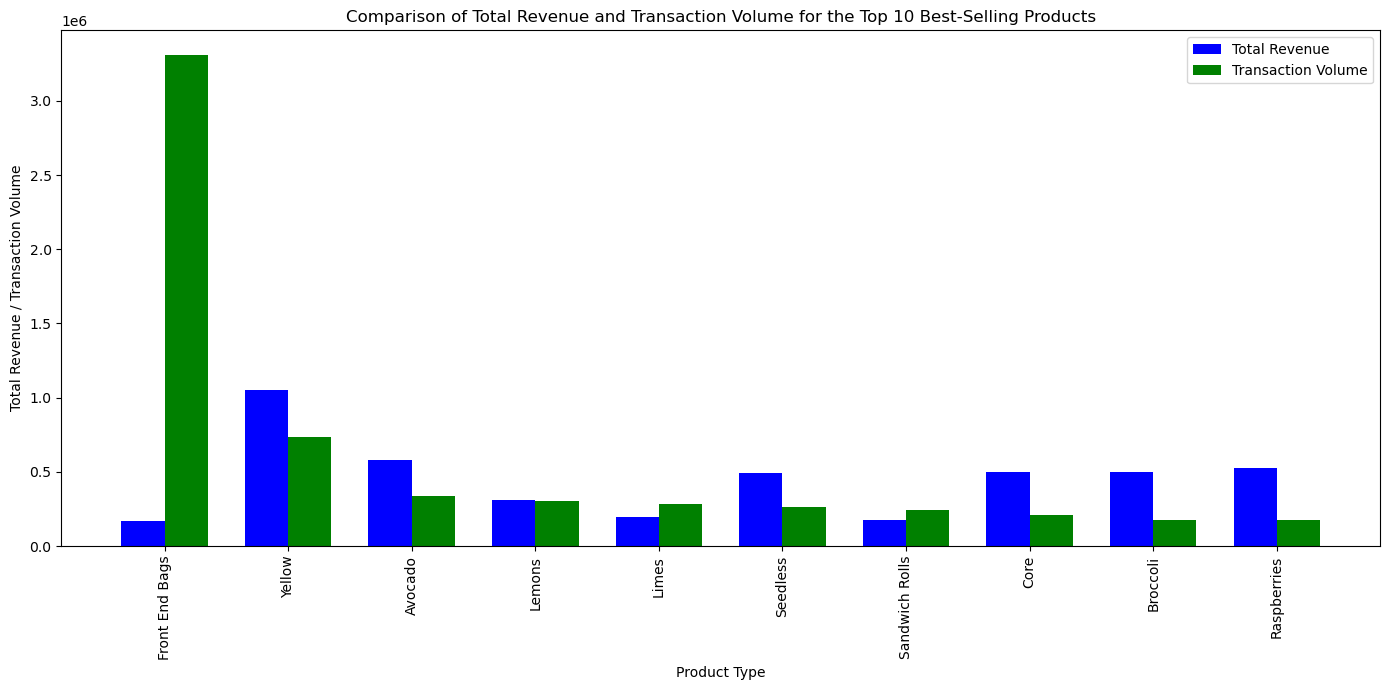

In [ ]:
print("\nTop 10 products by transaction volume:")
#display(top_volume_products.drop(['total_revenue'], axis=1))
display(top_volume_products)

# Setting up for side-by-side bar plot
bar_width = 0.35
index = np.arange(len(top_revenue_products))

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(index - bar_width/2, top_volume_products['total_revenue'], bar_width, label='Total Revenue', color='blue')
bars2 = ax.bar(index + bar_width/2, top_volume_products['transaction_volume'], bar_width, label='Transaction Volume', color='green')

ax.set_xlabel('Product Type')
ax.set_ylabel('Total Revenue / Transaction Volume')
ax.set_title('Comparison of Total Revenue and Transaction Volume for the Top 10 Best-Selling Products')
ax.set_xticks(index)
ax.set_xticklabels(top_volume_products['prod_type'])
ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 This graph reveals that certain products, despite not being the highest revenue generators, dominate sales in terms of quantity. This suggests a strategic insight for ACSE Supermarket: the importance of stocking and promoting these high-volume items, as they are likely driving customer traffic and could be pivotal in cross-selling opportunities.








QUESTION 4: What are the products with the most customer base? In other words, what is the % or
number of customers who have purchased each product?

In [ ]:
# I will calculate the number and percentage of customers who have purchased each product.
# First, let's find out the total number of unique customers in the entire dataset
total_customers = Data['cust_id'].nunique()
total_customers

404660

In [ ]:
# Next, let's group the data by all levels of product hierarchy and count unique customers for each product
customer_per_product = Data.groupby(['prod_section', 'prod_category', 'prod_subcategory', 'prod_type', 'prod_id'])['cust_id'].nunique().reset_index(name='unique_customers')
customer_per_product.head(10)

,prod_section,prod_category,prod_subcategory,prod_type,prod_id,unique_customers
0,Baby,Baby,Baby Accessories,Accessories,20005599,1
1,Baby,Baby,Baby Accessories,Accessories,20051009,9
2,Baby,Baby,Baby Accessories,Accessories,20063700,1
3,Baby,Baby,Baby Accessories,Accessories,20064025,6
4,Baby,Baby,Baby Accessories,Accessories,20064963,5
5,Baby,Baby,Baby Accessories,Accessories,20172819,1
6,Baby,Baby,Baby Accessories,Accessories,20173601,1
7,Baby,Baby,Baby Accessories,Accessories,20563276,1
8,Baby,Baby,Baby Accessories,Accessories,20563279,1
9,Baby,Baby,Baby Accessories,Accessories,20565475,1


In [ ]:
# Now let's calculate the percentage of customers for each product
customer_per_product['customer_percentage'] = (customer_per_product['unique_customers'] / total_customers) * 100
# Sort the products by the number of unique customers in descending order
customer_per_product_sorted = customer_per_product.sort_values(by='unique_customers', ascending=False)
customer_per_product_sorted.head(10)

,prod_section,prod_category,prod_subcategory,prod_type,prod_id,unique_customers,customer_percentage
62349,Home,Household,Front End Bags,Front End Bags,20189092,227743,56.280087
98468,Produce,Fruit,Bananas,Yellow,20175355001,107234,26.499778
99558,Produce,Vegetables,Field Veg,Seedless,20070132001,54899,13.566698
7127,Dairy,Milk & Eggs,Eggs,Core,20812144001,48174,11.904809
98550,Produce,Fruit,Citrus,Lemons,20028593001,44340,10.957347
100223,Produce,Vegetables,Tomatoes,On the Vine,20026703001,44287,10.944249
99261,Produce,Vegetables,Cooking Veg,Broccoli,20145621001,42428,10.484851
99852,Produce,Vegetables,Peppers,Red Peppers,20007535001,42064,10.394899
100197,Produce,Vegetables,Tomatoes,Beefsteak,20426141001,41700,10.304947
98522,Produce,Fruit,Berries/Cherries,Strawberries,20049778001,40123,9.915237


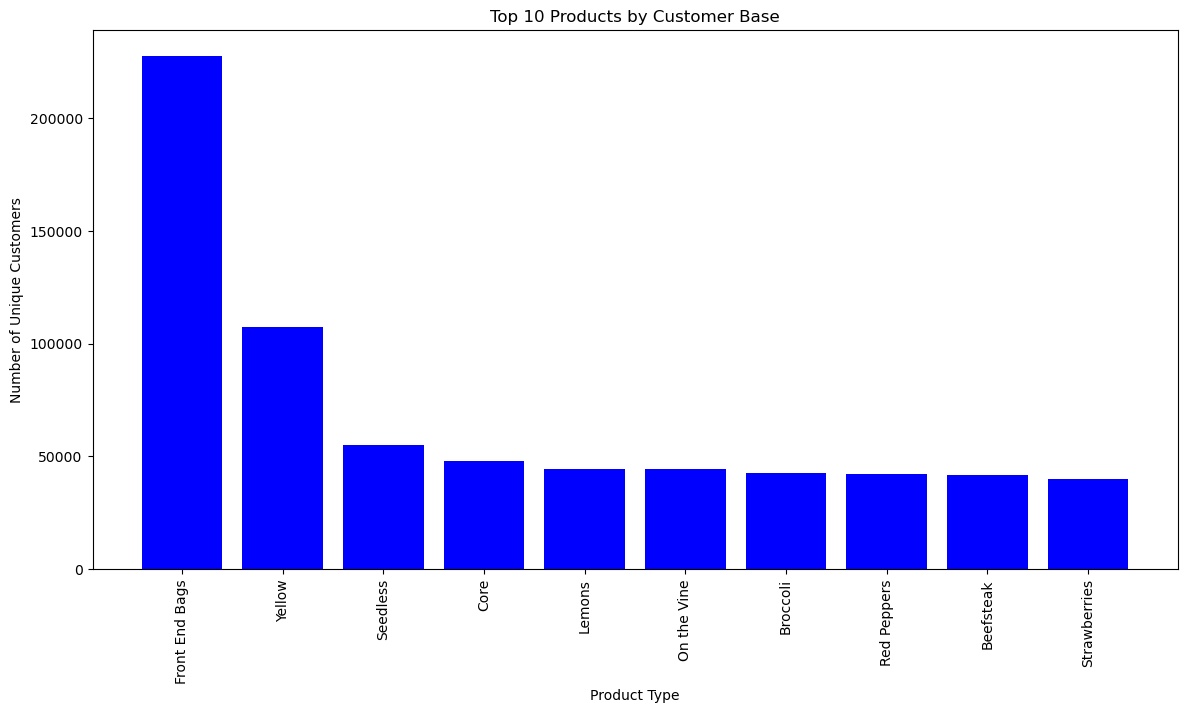

In [ ]:
top_products_customer_base = customer_per_product_sorted.head(10)
plt.figure(figsize=(14, 7))
plt.bar(top_products_customer_base['prod_type'].astype(str), top_products_customer_base['unique_customers'],color='blue')
plt.xlabel('Product Type')
plt.ylabel('Number of Unique Customers')
plt.title('Top 10 Products by Customer Base')
plt.xticks(rotation=90)
plt.show()

The bar chart illustrates the top 10 products at ACSE Supermarket with the largest unique customer base, with the front-end bags category leading significantly. This data highlights the products that are most commonly purchased across the customer spectrum, suggesting a strong and widespread consumer preference for these items within the supermarket's range.

QUESTION 5: Show the sales trend of seasonal products or food (e.g. ice cream during summer,
seasonal deli throughout the year)

In [ ]:
top10_products_to_generate_revenue = top_revenue_products[["prod_id","prod_section","prod_category","prod_subcategory",	"prod_type"	,"total_revenue"]]
top10_products_to_generate_revenue

,prod_id,prod_section,prod_category,prod_subcategory,prod_type,total_revenue
1218,20027156,Customer Service,Lottery - Electronic,LOTTERY - ELECTRONIC,Electronic,1072253.75
84837,20175355001,Produce,Fruit,Bananas,Yellow,1052886.84
61325,21087193,Meat,Fresh-Poultry,Fresh-Poultry,Breasts,775428.01
92721,20425775001,Produce,Fruit,Grapes,Green Grapes,756235.44
8940,20252014,HMR,HMR,Ready to Eat,Whole Rotisserie Chicken,755620.45
15155,20600985,Deli,Gourmet Foods,Gourmet Foods,Olives,673152.02
23863,20794110,Meat,Fresh Beef,Fresh-Beef,AAA,641822.43
84569,20159199001,Produce,Fruit,Grapes,Red Grapes,640238.30
25710,20821992,Meat,Fresh-Poultry,Fresh-Poultry,Breasts,619704.29
8557,20188873,Dairy,Milk & Eggs,Milk,Core Milk,612231.33


In [ ]:
top10_products_in__frequency = top_volume_products[["prod_id","prod_type"]]
top10_products_in__frequency

,prod_id,prod_type
8570,20189092,Front End Bags
84837,20175355001,Yellow
101574,21097012001,Avocado
82645,20028593001,Lemons
82842,20040489001,Limes
83242,20070132001,Seedless
3469,20076950,Sandwich Rolls
97272,20812144001,Core
84346,20145621001,Broccoli
84116,20128938001,Raspberries


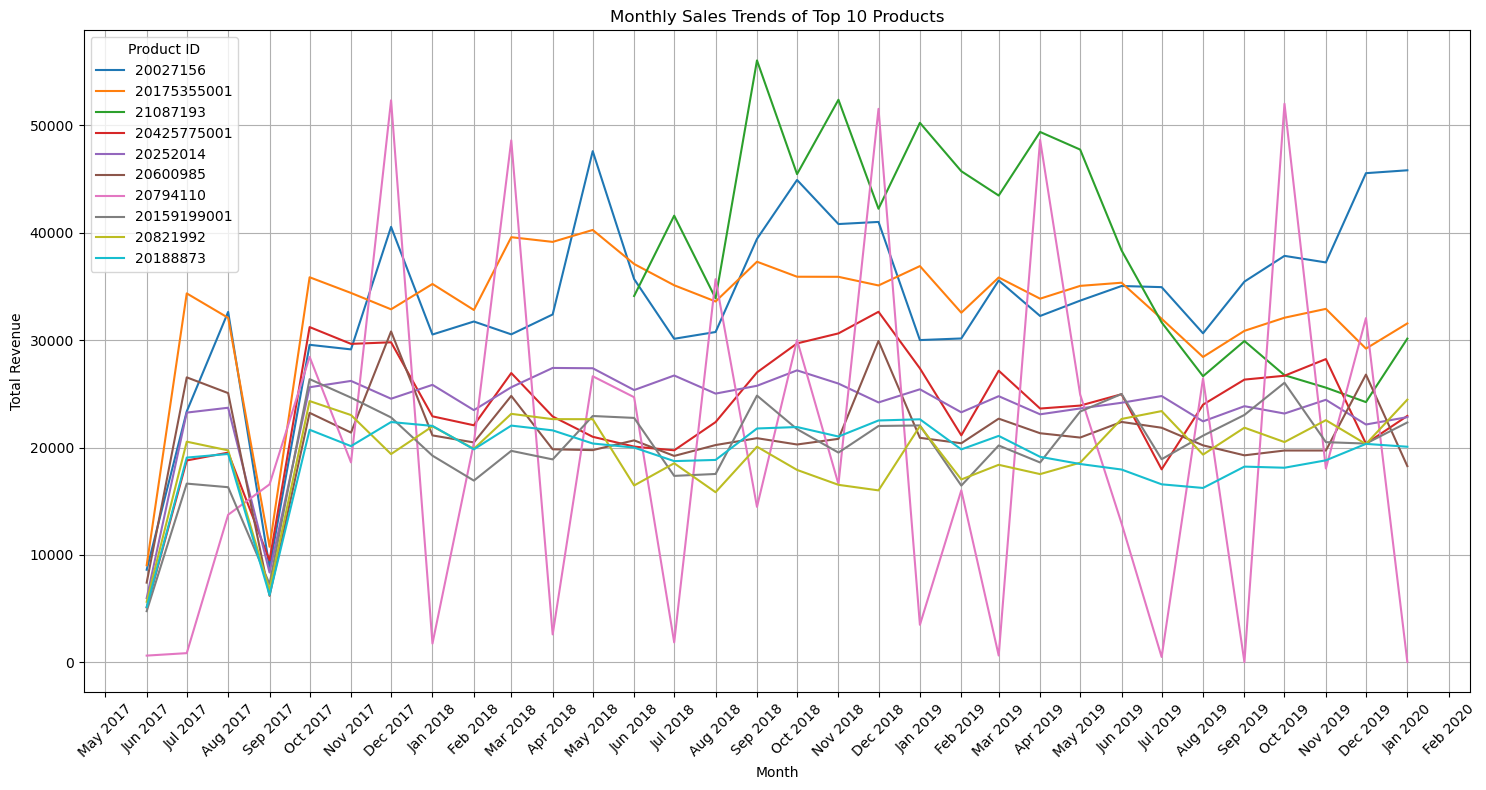

In [ ]:
# One way to answer this question:
Data['trans_dt'] = pd.to_datetime(Data['trans_dt'])
# Extract year and month from the transaction date
Data['year'] = Data['trans_dt'].dt.year
Data['month'] = Data['trans_dt'].dt.strftime('%Y-%m')  # Format as 'YYYY-MM'

# Filter the main DataFrame for only the top 10 product IDs
top10_product_ids = top10_products_to_generate_revenue['prod_id'].tolist()
top_products_data = Data[Data['prod_id'].isin(top10_product_ids)]

# Group by product ID, year, and month; then sum up the sales amount
monthly_sales = top_products_data.groupby(['prod_id', 'month'])['sales_amt'].sum().unstack('prod_id')

# Sort the months for plotting (assuming all years have all months)
monthly_sales = monthly_sales.loc[sorted(monthly_sales.index)]

# Plot the trends for each product
fig, ax = plt.subplots(figsize=(15, 8))

# Use a colormap to generate distinct colors for each product ID
for i, product_id in enumerate(top10_product_ids):
    ax.plot(pd.to_datetime(monthly_sales.index), monthly_sales[product_id], label=str(product_id))

# Format the x-axis to show abbreviated month names and years ('Jan 2017', 'Feb 2017', etc.)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Set the plot title and labels
ax.set_title('Monthly Sales Trends of Top 10 Products')
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue')

# Enable the legend
ax.legend(title='Product ID')

# Show the grid and the plot
ax.grid(True)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [ ]:
monthly_sales.head(5)

prod_id,20027156,20188873,20252014,20600985,20794110,20821992,21087193,20159199001,20175355001,20425775001
month,,,,,,,,,,
2017-06,8628.00,5158.16,5986.25,7426.57,633.89,5641.22,NaN,4769.09,9045.33,5121.98
2017-07,23361.00,19065.55,23254.00,26533.83,862.78,20547.08,NaN,16644.44,34348.77,18798.35
2017-08,32624.63,19400.94,23705.04,25067.91,13744.71,19735.02,NaN,16308.17,32075.86,19528.09
2017-09,8829.00,6268.36,8369.01,6197.33,16572.90,6744.15,NaN,7302.83,10766.87,9491.96
2017-10,29563.00,21655.29,25614.35,23231.07,28439.17,24326.83,NaN,26368.62,35850.94,31214.08


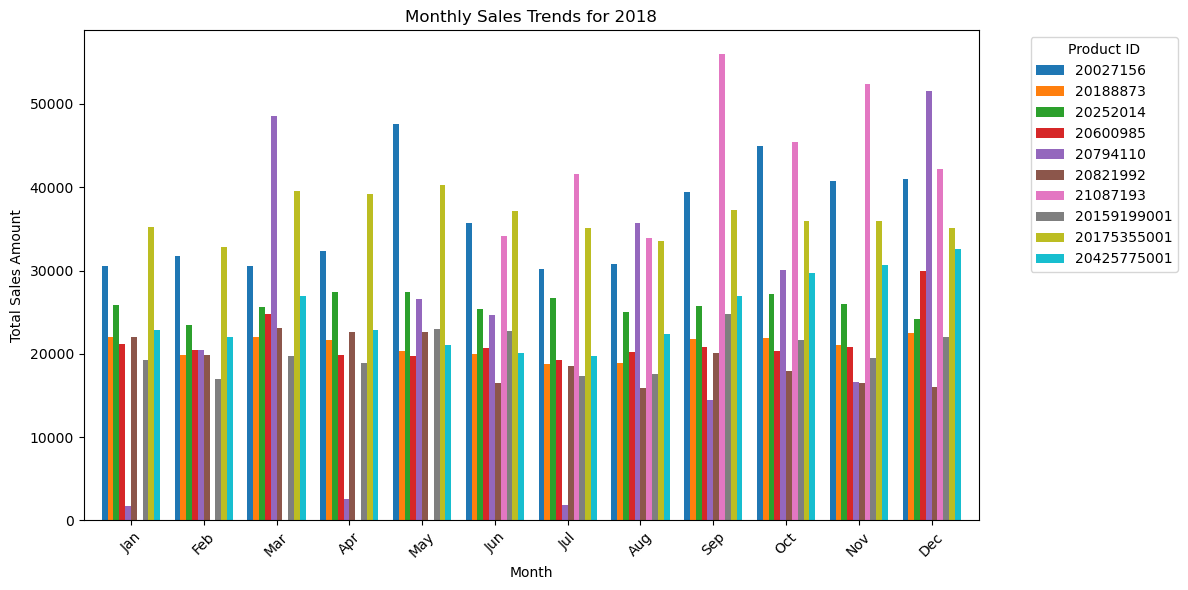

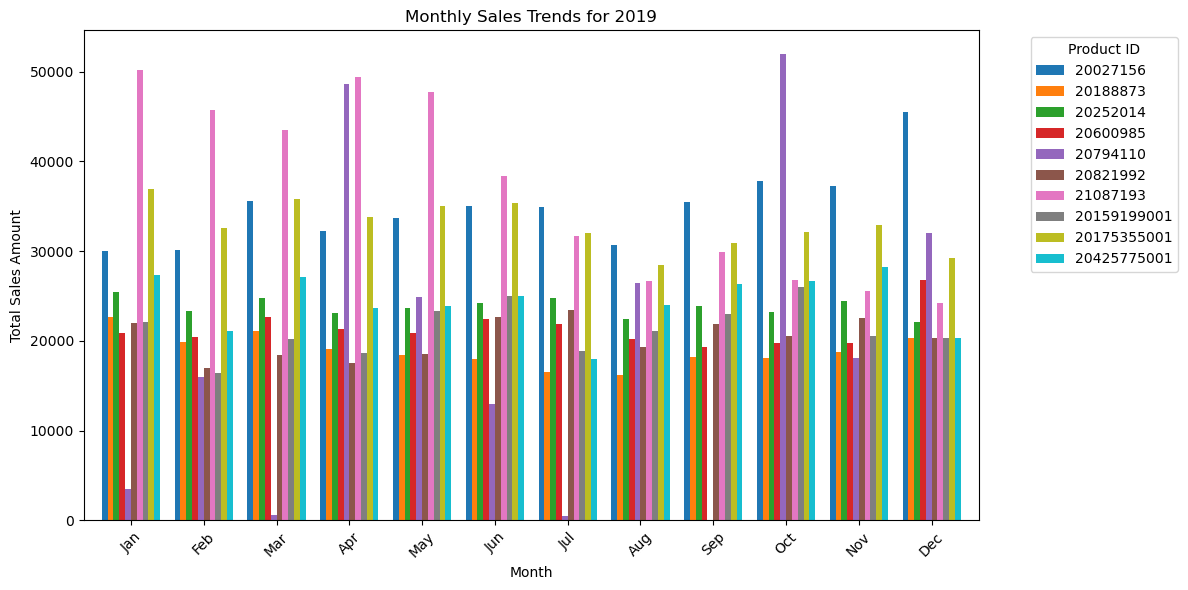

In [ ]:
#Second way to visualize this: We decide to use this way since its where I have complete years
import pandas as pd
import matplotlib.pyplot as plt
from calendar import month_abbr

# Convert the 'month' index to DateTimeIndex
monthly_sales.index = pd.to_datetime(monthly_sales.index)

# Get a sorted list of unique years, excluding 2017 and 2020
unique_years = sorted(top_products_data['year'].unique())
unique_years = [year for year in unique_years if year not in (2017, 2020)]

# Continue with the plotting for each of the remaining years
for year in unique_years:
    # Create a new DataFrame for each year to avoid SettingWithCopyWarning
    yearly_sales = monthly_sales.loc[monthly_sales.index.year == year].copy()
    yearly_sales['month'] = yearly_sales.index.month  # Extract month for plotting

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    # Set the index to month numbers and ensure all months are represented
    yearly_sales.set_index('month', inplace=True)
    yearly_sales = yearly_sales.reindex(range(1, 13)).fillna(0)  # Ensure all months are present
    yearly_sales.plot(kind='bar', ax=ax, width=0.8)

    # Setting the x-axis to month abbreviations
    ax.set_xticklabels([month_abbr[i] for i in range(1, 13)])
    ax.set_title(f'Monthly Sales Trends for {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Sales Amount')
    ax.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

QUESTION 6: Are there any products that have quality-issue (aka. High return rate; negative sales_amt
or sales_wgt)

In [ ]:
# Specifically check for negative values in 'sales_amt' and 'sales_wgt' to confirm they indicate returns
negative_sales_amt = Data[Data['sales_amt'] < 0]
negative_sales_wgt = Data[Data['sales_wgt'] < 0]

# Check the counts of negative values to assess the return transactions
print(f"Number of transactions with negative sales_amt: {negative_sales_amt.shape[0]}")
print(f"Number of transactions with negative sales_wgt: {negative_sales_wgt.shape[0]}")

Number of transactions with negative sales_amt: 651001
Number of transactions with negative sales_wgt: 3286


A large number of negative sales_amt transactions strongly suggest a return process is captured in the data. Customers are likely returning products, which results in negative revenue for those transactions.
Whereas the lower number of negative sales_wgt transactions might indicate that not all products have weights associated with them or that weights are not always recorded when products are returned.


In [ ]:
# Convert 'trans_dt' to datetime if it is not already
Data['trans_dt'] = pd.to_datetime(Data['trans_dt'])
# Add a column to indicate whether a transaction is a return
# This assumes that a negative 'sales_amt' or 'sales_wgt' indicates a return
Data['is_return'] = (Data['sales_amt'] < 0) | (Data['sales_wgt'] < 0)
Data.head(10)

,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value,year,month,is_return
0,170626010790603094,2017-06-26,1079,1129468649,20863017,6.99,1,0.0,YVES FALAFEL BALLS,Deli,Gourmet Foods,Gourmet Foods,Meat Alternatives,YVES,1.0,G,240.0,2017,2017-06,False
1,170626010790603067,2017-06-26,1079,1048060135,20425475,12.09,1,0.0,ACSE LEMON AND LIME JUICER,Home,Kitchen Prep,Kitchen Gadgets,Baking & Cooking,ACSE,1.0,EA,1.0,2017,2017-06,False
2,170626010790603073,2017-06-26,1079,1018749739,20842545,4.49,1,0.0,FROSTED FLAKES CEREAL,Grocery,Breakfast,Cereal Rte,Adult,KLGS,1.0,G,425.0,2017,2017-06,False
3,170626010790603073,2017-06-26,1079,1018749739,20293336007,1.94,1,0.0,GM NANTUCKET MED ROAST KCUP,Grocery,Hot Beverages & Accessories,Coffee,Single Cup,KRIG,1.0,EA,12.0,2017,2017-06,False
4,170626010790603050,2017-06-26,1079,1092380896,20664782003,5.99,1,0.0,PERRIER SLIM CANS LIME,Grocery,Cold Beverages,Water,Carbonated Flavor,PERI,10.0,ML,250.0,2017,2017-06,False
5,170626010790603067,2017-06-26,1079,1048060135,20315581006,1.49,1,0.0,CL LEAF TUNA LT TOMATO ONION,Grocery,Canned,Canned Fish/Meat,Canned Tuna,CLVL,1.0,G,85.0,2017,2017-06,False
6,170626010790603073,2017-06-26,1079,1018749739,20313447002,1.59,1,0.0,UNICO CHICK PEAS,Grocery,Canned,Canned Vegetables,Regular,UNIC,1.0,ML,540.0,2017,2017-06,False
7,170626010790603073,2017-06-26,1079,1018749739,20299465005,1.75,1,0.0,UB FAST N FANCY CHKN FLAV RICE,Grocery,Meal Makers,Side Dish/Rice,Instant Side dishes,UNCL,1.0,G,165.0,2017,2017-06,False
8,170626010790603067,2017-06-26,1079,1048060135,20827312,2.49,1,0.0,AL WADI BROWN COARSE BULGUR,Grocery,Meal Makers,Beans/Dried Vegetabl,Grains/Soup Mix,WADI,1.0,G,908.0,2017,2017-06,False
9,170626010790603073,2017-06-26,1079,1018749739,20415436002,5.99,1,0.0,ACSE PCBL PASTA SAUCE VODKA,Grocery,Meal Makers,Sauces/Marinades,Premium,ACSE,1.0,ML,650.0,2017,2017-06,False


In [ ]:
# Group the data by the product hierarchy
grouped_data = Data.groupby(['prod_section', 'prod_category', 'prod_subcategory', 'prod_type', 'prod_id'])

# Calculate total sales (absolute values to include returns in the total calculation correctly)
# Calculate total returns (sum of negative sales amounts to capture the returns)
calculation = grouped_data.agg(
    total_sales_amt=pd.NamedAgg(column='sales_amt', aggfunc=lambda x: x.abs().sum()),
    total_returned_amt=pd.NamedAgg(column='sales_amt', aggfunc=lambda x: x[x < 0].sum()),
    total_sales_qty=pd.NamedAgg(column='sales_qty', aggfunc='sum'),  # Assuming positive values indicate sales
    total_returned_qty=pd.NamedAgg(column='sales_qty', aggfunc=lambda x: x[x < 0].sum())  # Assuming negative values indicate returns
).reset_index()

# Calculate return rate by amount and quantity (in absolute terms)
calculation['return_rate_by_amt'] = calculation['total_returned_amt'].abs() / calculation['total_sales_amt']
calculation['return_rate_by_qty'] = calculation['total_returned_qty'].abs() / calculation['total_sales_qty'].abs()

# Replace infinite values and NaNs resulted from division by zero with zeros or other appropriate value
calculation.replace([float('inf'), -float('inf'), pd.NA], 0, inplace=True)

In [ ]:
# Sort the DataFrame by 'return_rate_by_amt' and 'return_rate_by_qty' in descending order
sorted_calculation = calculation.sort_values(by=['return_rate_by_amt', 'return_rate_by_qty'], ascending=[False, False])
# Display the sorted DataFrame
sorted_calculation.head(100)  ##--run from here:

,prod_section,prod_category,prod_subcategory,prod_type,prod_id,total_sales_amt,total_returned_amt,total_sales_qty,total_returned_qty,return_rate_by_amt,return_rate_by_qty
339,Baby,Baby,Baby Accessories,Potty,20183200001,16.99,-16.99,-1,-1,1.000000,1.000000
675,Baby,Baby,Baby Toiletries,Toddler,21194299,5.99,-5.99,-1,-1,1.000000,1.000000
7412,Dairy,Milk & Eggs,Milk,Premium Milk,20057494,5.89,-5.89,-1,-1,1.000000,1.000000
11951,Entertainment,Photo Image,Off-Site,Off-site,20784140,60.00,-60.00,-1,-1,1.000000,1.000000
12595,Entertainment,Reading,Books-Adult,Non Fiction,20965832,11.39,-11.39,-1,-1,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
76064,Mass Cosmetics,Colour Cosmetics - Mass,Eye Colour,Eye Shadow,20733363002,9.79,-5.90,1,0,0.602656,0.000000
72118,Home,Soft Goods (Textiles),Sheets,Duvet Covers,21006673,124.98,-74.99,0,-1,0.600016,0.000000
62259,Home,Household,Foil-Household,Baking,20941884,9.26,-5.50,3,-1,0.593952,0.333333
67441,Home,Kitchen Prep,Serveware,Platters And Trays,20939549,321.34,-182.04,1,-12,0.566503,12.000000


This table reveals that certain products, notably 'Baby Accessories Bath 21067490', 'Baby Accessories Bath 21067549', and 'Baby Accessories Bath 21067215', exhibit exceptionally high return rates. This trend indicates potential quality or customer satisfaction issues, suggesting that these products should be prioritized for a comprehensive quality review and corrective action to mitigate the high incidence of returns.

QUESTION 7: What are the products that have the highest cross-selling rates? (e.g., plastic bags are
always bought with other products. People are not coming to buy plastic bags alone)

In [ ]:
#!pip install efficient-apriori
import pandas as pd
from efficient_apriori import apriori

# Assuming 'Data' is your DataFrame and it's already been loaded
# Group the data by 'trans_id' and collect all 'prod_id' in a list for each transaction
transactions = Data.groupby('trans_id')['prod_id'].apply(list).tolist()

# Run the apriori algorithm
itemsets, rules = apriori(transactions, min_support=0.01, min_confidence=0.1)

# Now, you have the itemsets and rules.
# You can print them out or further process them as needed
# Here's how you might print the rules sorted by confidence and lift:
sorted_rules = sorted(rules, key=lambda rule: (rule.confidence, rule.lift), reverse=True)

# Print out the top 10 rules
for rule in sorted_rules[:10]:
    print(rule)  # Prints the rule and its metrics

{20123850} -> {20047851} (conf: 0.995, supp: 0.022, lift: 42.215, conv: 178.460)
{20047851} -> {20123850} (conf: 0.946, supp: 0.022, lift: 42.215, conv: 18.126)
{20070132001} -> {20175355001} (conf: 0.378, supp: 0.015, lift: 2.890, conv: 1.397)
{20145621001} -> {20175355001} (conf: 0.375, supp: 0.011, lift: 2.866, conv: 1.391)
{20070132001} -> {20189092} (conf: 0.373, supp: 0.014, lift: 1.214, conv: 1.105)
{20812144001} -> {20189092} (conf: 0.367, supp: 0.012, lift: 1.196, conv: 1.095)
{21097012001} -> {20189092} (conf: 0.365, supp: 0.010, lift: 1.188, conv: 1.091)
{20175355001} -> {20189092} (conf: 0.357, supp: 0.047, lift: 1.164, conv: 1.078)
{20145621001} -> {20189092} (conf: 0.356, supp: 0.010, lift: 1.158, conv: 1.075)
{20007535001} -> {20175355001} (conf: 0.356, supp: 0.010, lift: 2.719, conv: 1.349)


In [ ]:
# First, ensure networkx is installed
!pip install networkx matplotlib

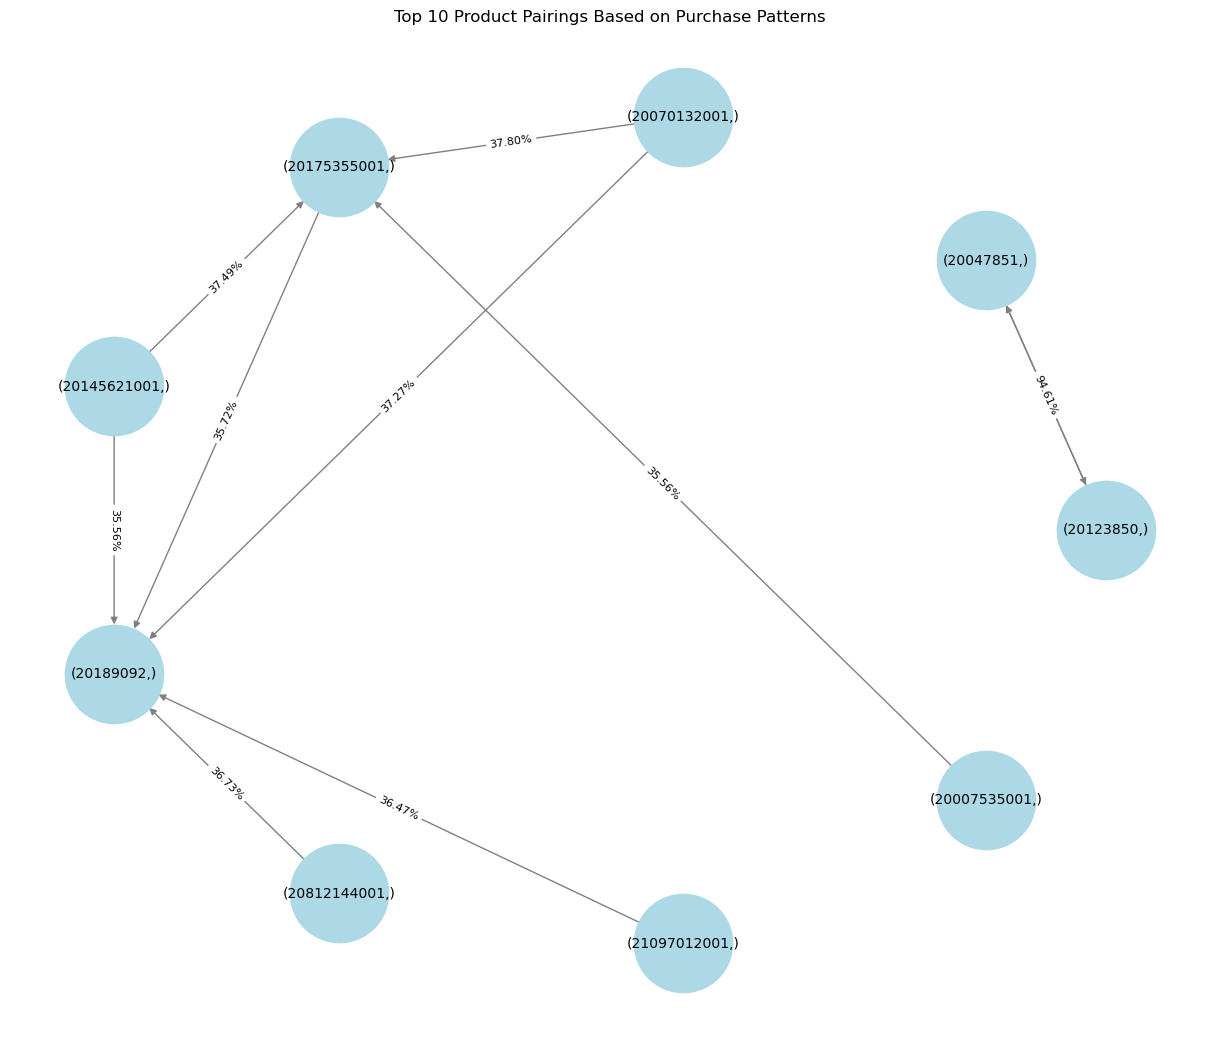

In [ ]:

# Create a directed graph
G = nx.DiGraph()

# Iterate over the top N association rules to add edges
for rule in sorted_rules[:10]:  # You can change the number based on how many rules you want to visualize
    # In efficient_apriori, 'lhs' (left-hand side) is equivalent to 'antecedents'
    # and 'rhs' (right-hand side) is equivalent to 'consequents'.
    antecedents = tuple(rule.lhs)  # convert antecedents to a tuple for consistent labeling
    consequents = tuple(rule.rhs)  # convert consequents to a tuple for consistent labeling

    # Add edge with attributes for weight, which we're setting as the confidence of the rule formatted as a percentage
    G.add_edge(antecedents, consequents, weight=f"{rule.confidence:.2%}")  # format confidence as a percentage

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.circular_layout(G)  # Positions nodes in a circle which often looks clean for small graphs
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=10, edge_color='gray')

# Draw edge labels using the weight attribute (formatted confidence)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=8)

# Show the plot
plt.title('Top 10 Product Pairings Based on Purchase Patterns')
plt.show()

QUESTION 8: Correlation between product categories. What products are purchased the most with what products?


In [ ]:
import pandas as pd
import networkx as nx
from efficient_apriori import apriori
import matplotlib.pyplot as plt
# Instead of using 'prod_id', we use 'prod_category' to find associations between categories.
transactions = Data.groupby('trans_id')['prod_category'].apply(list).tolist()

# Run the apriori algorithm
itemsets, rules = apriori(transactions, min_support=0.01, min_confidence=0.1)

# Sort the rules by confidence and lift
sorted_rules = sorted(rules, key=lambda rule: (rule.confidence, rule.lift), reverse=True)

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights and nodes to the graph based on product categories
for rule in sorted_rules[:10]:  # Adjust the number as needed
    antecedents = ', '.join(map(str, rule.lhs))
    consequents = ', '.join(map(str, rule.rhs))
    G.add_edge(antecedents, consequents, weight=rule.lift)

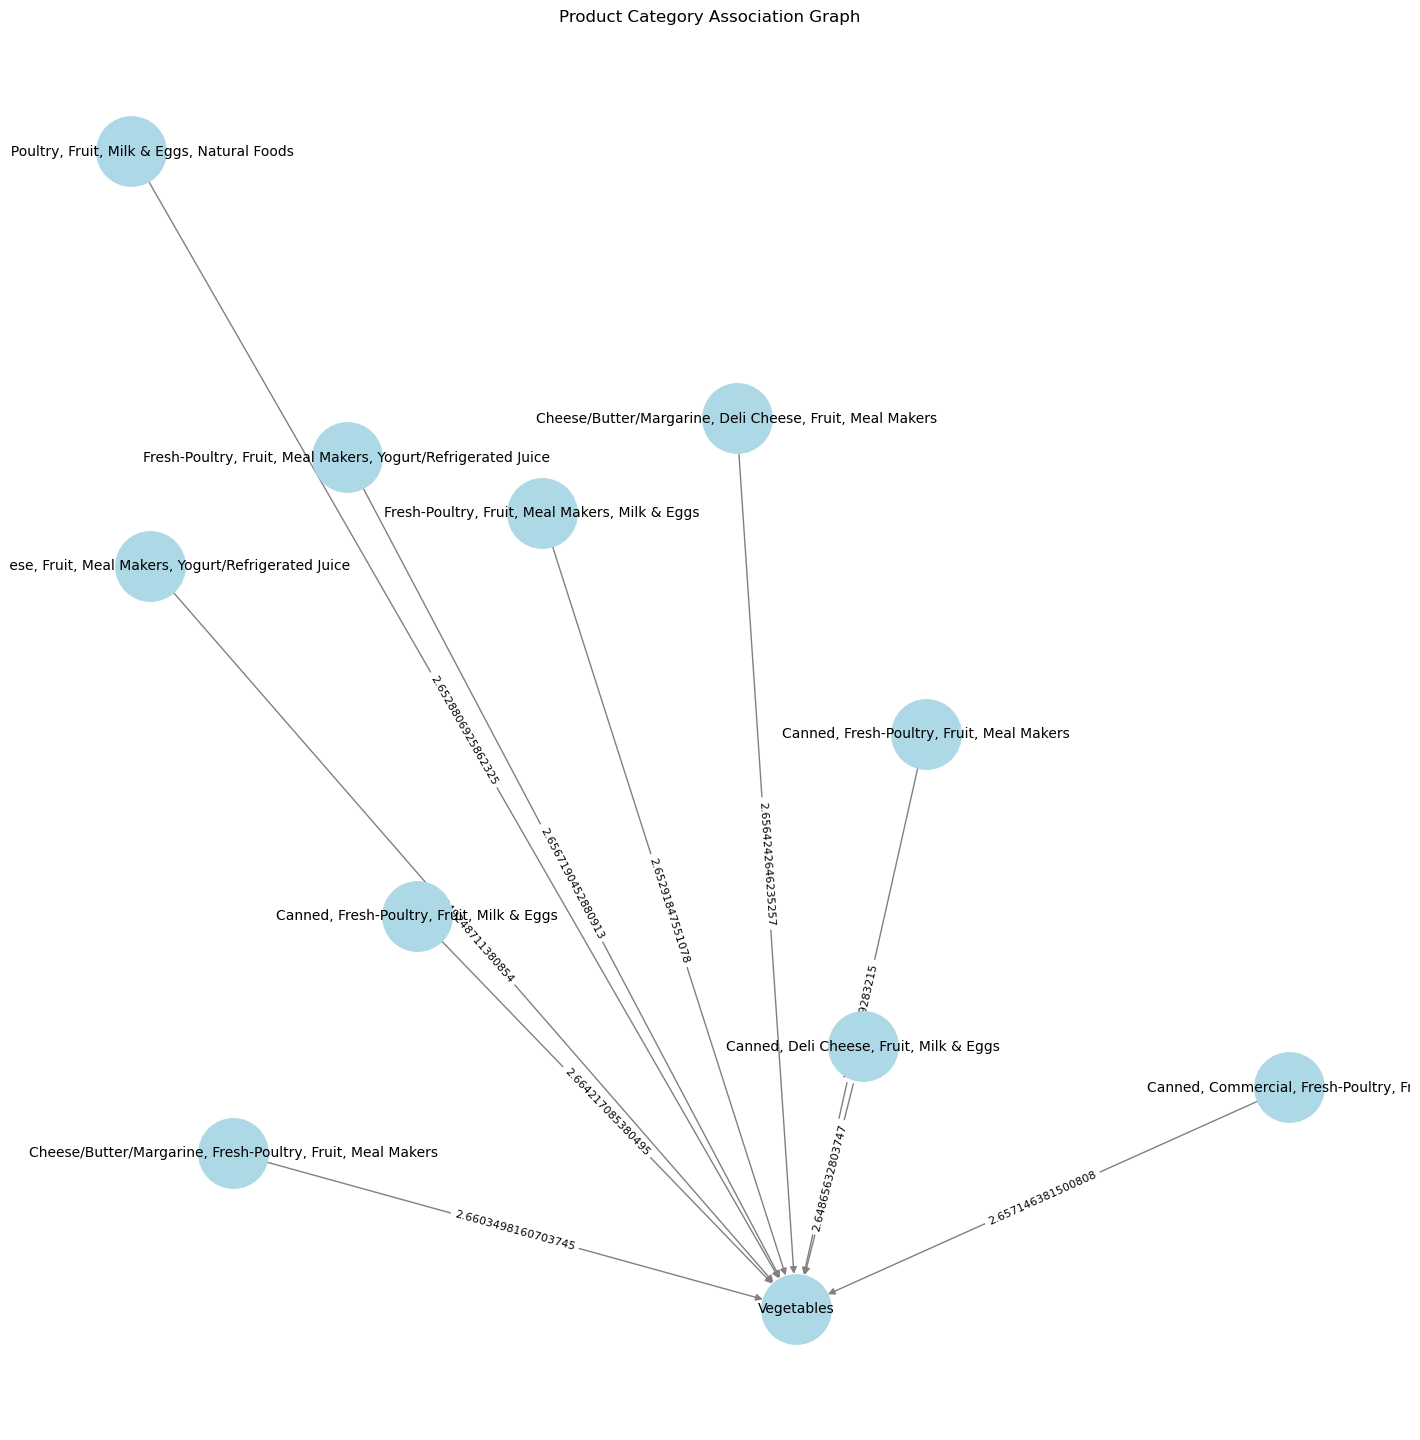

In [ ]:
# You can choose a layout that visually looks better for your dataset
pos = nx.spring_layout(G)

# Draw the network graph
plt.figure(figsize=(14, 14))
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightblue', font_size=10, edge_color='gray')

# Draw edge labels to show the lift values
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=8)

# Set the title and turn off the axis
plt.title('Product Category Association Graph')
plt.axis('off')

# Show the plot
plt.show()

QUESTION 9: What % of transactions are ACSE-made products?

In [ ]:
# Filter the DataFrame for transactions with ACSE-made products
acse_transactions = Data[Data['prod_mfc_brand_cd'] == 'ACSE']

# Count the number of unique transactions with ACSE-made products
unique_acse_transactions = acse_transactions['trans_id'].nunique()

# Count the total number of transactions
total_transactions = Data['trans_id'].nunique()

# Calculate the percentage of transactions with ACSE-made products
percentage_acse_transactions = (unique_acse_transactions / total_transactions) * 100

# Print the result
print(f"Percentage of transactions with ACSE-made products: {percentage_acse_transactions:.2f}%")

Percentage of transactions with ACSE-made products: 79.80%


This reveals a significant brand presence in sales transactions, with ACSE-made products comprising 79.8% of all transactions. This underscores ACSE's strong market penetration and pivotal role in our product mix.